In [1]:
import pandas as pd
import numpy as np
import scanpy
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import sklearn.decomposition

In [9]:
x = scanpy.read('../processed_data/counts.h5ad')
x

AnnData object with n_obs × n_vars = 280327 × 254

In [15]:
x.uns

OverloadedDict, wrapping:
	OrderedDict()
With overloaded keys:
	['neighbors'].

In [17]:
x.__dict__

{'_X': array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 6.1383426e-01,
         3.8716495e-02, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 6.1811280e-01,
         5.1406868e-02, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 4.4882911e-01,
         4.1903242e-02, 0.0000000e+00],
        ...,
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 5.6548023e+00,
         4.2430919e-02, 4.5176870e-03],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.1598111e+01,
         2.7926207e-01, 7.2065614e-02],
        [0.0000000e+00, 4.7502649e-01, 0.0000000e+00, ..., 1.4223028e+01,
         3.1781629e-01, 1.0914283e+00]], dtype=float32),
 '_adata_ref': None,
 '_is_view': False,
 '_layers': Layers with keys: ,
 '_n_obs': 280327,
 '_n_vars': 254,
 '_obs': Empty DataFrame
 Columns: []
 Index: [10000143038275111136124942858811168393, 100001798412490480358118871918100400402, 100006878605830627922364612565348097824, 10

In [2]:
sc = scanpy.read_h5ad('../processed_data/counts.h5ad')
sc

AnnData object with n_obs × n_vars = 280327 × 254

#280,327 cells
#254 genes
#I don't know if this counts is pre-processed or not

They said that:

> We   normalized the mean   total RNA   counts per cell to a same mean value (250 in this case) for each experiment to   remove the influence   of  these  batch  effects  .

In [3]:
counts_df = sc.to_df()
counts_df

index,1700022I11Rik,1810046K07Rik,5031425F14Rik,5730522E02Rik,Acta2,Adam2,Adamts2,Adamts4,Adra1b,Alk,...,Gad2,Tac2,Lamp5,Cnr1,Pvalb,Sst,Rab3b,Slc17a7,Penk,Gad1
index,,,,,,,,,,,,,,,,,,,,,
10000143038275111136124942858811168393,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.659448,0.000000,...,0.261892,0.262109,0.037601,0.010633,0.192950,0.079685,0.063194,0.613834,0.038716,0.000000
100001798412490480358118871918100400402,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.512115,0.225832,0.093828,0.000000,0.160687,0.171461,0.208027,0.618113,0.051407,0.000000
100006878605830627922364612565348097824,0.0,0.000000,0.0,0.000000,25.567039,0.0,0.000000,0.000000,0.000000,0.000000,...,0.199059,0.114653,0.000000,0.070231,0.144294,0.051351,0.148232,0.448829,0.041903,0.000000
100007228202835962319771548915451072492,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.240500,0.093413,0.033100,0.151837,0.197471,0.011399,0.110675,1.117577,0.016462,0.467554
100009332472089331948140672873134747603,0.0,0.491629,0.0,0.983257,0.491629,0.0,0.000000,0.000000,0.983257,0.000000,...,1.726676,0.533404,3.691514,0.000000,0.296567,0.748264,1.423427,11.386119,0.387408,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99987465505639073211021560543065098772,0.0,0.000000,0.0,0.557620,0.000000,0.0,0.000000,0.000000,0.557620,2.788098,...,4.711612,1.145445,0.000000,0.362137,1.549598,0.195306,4.132728,1.586415,0.152228,8.515803
99989592830367590092304100078674096866,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.829112,14.632893,0.000000,...,0.354238,0.160562,0.630489,0.030634,0.073509,0.000000,0.210928,4.954309,0.140572,0.107833
99991756591196613545069880666241120777,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.944207,0.221704,0.139209,0.854429,0.296027,0.110999,0.432686,5.654802,0.042431,0.004518


In [4]:
bin_counts_df = counts_df > 0
cell_gene_counts = bin_counts_df.sum(axis=1).reset_index(name='num_distinct_genes')
cell_gene_counts

,index,num_distinct_genes
0,10000143038275111136124942858811168393,54
1,100001798412490480358118871918100400402,28
2,100006878605830627922364612565348097824,26
3,100007228202835962319771548915451072492,30
4,100009332472089331948140672873134747603,127
...,...,...
280322,99987465505639073211021560543065098772,112
280323,99989592830367590092304100078674096866,57
280324,99991756591196613545069880666241120777,27
280325,99997421766159526763299676887100858104,53


In [5]:
cell_gene_counts['num_distinct_genes'].median()

76.0

In [6]:
cell_gene_counts['num_distinct_genes'].mean()

75.62902966892237

## Ok I think that this is post-processed data since the mean of RNA counts in all cells is around 250

It's not exactly 250 because the cells are in different experiments for normalization, but I normed over all cells here. Actually I'm not sure that makes sense. No, I don't think it does


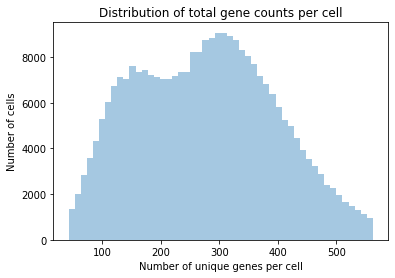

In [9]:
sns.distplot(
    sc.to_df().sum(axis=1),
    kde = False,
)
plt.title('Distribution of total gene counts per cell')
plt.xlabel('Number of unique genes per cell')
plt.ylabel('Number of cells')
plt.show()
plt.close()

Interestingly, to me at least, they did PCA before clustering

>   We  performed     dimensionality  reduction   of   the     matrix     using   PCA  ,   and  used     the   first  35     principal  components

In [10]:
x = sc.to_df()
print(x.shape)
pca = sklearn.decomposition.PCA(n_components = 35)
y = pca.fit_transform(x)
print(x.shape)
print(y.shape)

(280327, 254)
(280327, 254)
(280327, 35)


> We  then  performed   graph  -  based  Louvain  community  detection  42     in  the   35     PC     space     using Scanpy  65     for a range of   nearest     neighborhood size k     values     with a     bootstrap     analysis to both   identify stable clusters and select the optimal k     value   (k = 10) 

In [11]:
pca_sc = scanpy.AnnData(y)
scanpy.pp.neighbors(pca_sc, n_neighbors=10)
scanpy.tl.louvain(pca_sc)

In [12]:
pca_sc.obs['louvain']

0          3
1          5
2         26
3         15
4          2
          ..
280322    14
280323    12
280324     0
280325    12
280326    18
Name: louvain, Length: 280327, dtype: category
Categories (34, object): [0, 1, 2, 3, ..., 30, 31, 32, 33]

In [13]:
pca_sc.obs['louvain'].unique().size

34

## only getting 29 categories, MERFISH said they got 95

Reading more, they do multiple rounds of clustering and lots of filtering
I should ask them for the cell type info, don't waste time trying to copy all their clustering

Alternatively, I can cluster the scRNAseq and MERFISH data together to find clusters that way

In [14]:
scanpy.tl.umap(pca_sc)

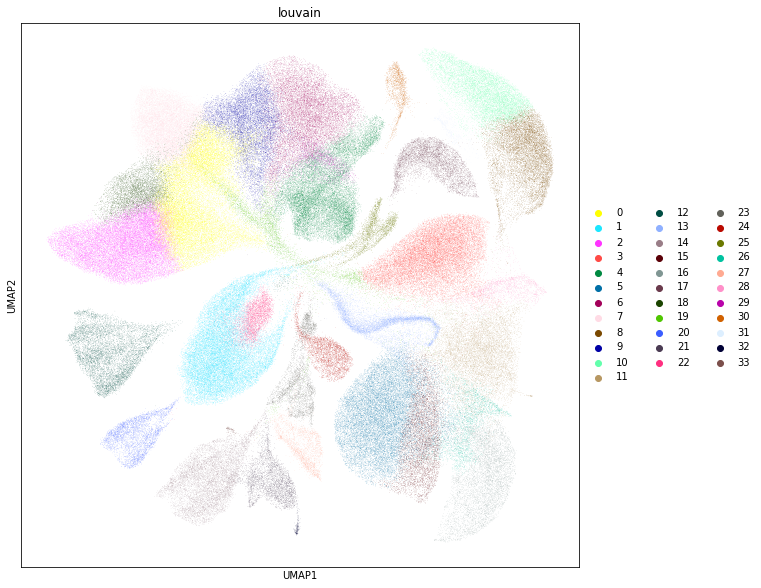

In [15]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 10
scanpy.pl.umap(pca_sc, color='louvain')

In [16]:
cell_groupings = pd.DataFrame({
    'cell_id':sc.to_df().index,
    'cluster':pca_sc.obs['louvain'],
})
cell_groupings

,cell_id,cluster
0,10000143038275111136124942858811168393,3
1,100001798412490480358118871918100400402,5
2,100006878605830627922364612565348097824,26
3,100007228202835962319771548915451072492,15
4,100009332472089331948140672873134747603,2
...,...,...
280322,99987465505639073211021560543065098772,14
280323,99989592830367590092304100078674096866,12
280324,99991756591196613545069880666241120777,0
280325,99997421766159526763299676887100858104,12


In [ ]:
cell_groupings.to_csv('../processed_data/20210122_cell_id_to_cluster_number.csv',index=False)

In [22]:
cell_groupings.groupby(['cluster']).size().reset_index(name='num_cells')

,cluster,num_cells
0,0,24720
1,1,22781
2,2,21348
3,3,19766
4,4,19156
5,5,19069
6,6,13179
7,7,12281
8,8,11194
9,9,11160


In [23]:
cells = pd.read_csv('../processed_data/q90_cells.csv')
cells.shape

(23751, 5)

In [42]:
cell_groupings['cluster'] = cell_groupings['cluster'].astype(int)

In [43]:
cell_id_to_cluster = dict(cell_groupings[['cell_id','cluster']].values)
cells['cluster_id'] = cells['cell_id'].map(cell_id_to_cluster)
cells.head()

,cell_id,boundaryX,boundaryY,slice_id,sample,cluster_id
0,102513782275574352391549636869222584212,"2097.1362953431903, 2097.1362953431903, 2097.1...","2346.248493306339, 2345.705993324518, 2345.163...",mouse2_slice10,mouse2sample2,12
1,198259986845326386185083518576166673028,"2106.141795041412, 2106.141795041412, 2106.141...","2328.9969938844442, 2328.4544939026237, 2327.9...",mouse2_slice10,mouse2sample2,4
2,202633430165103308157026102881717708611,"2058.727296630293, 2058.727296630293, 2058.727...","2228.8514972403646, 2228.308997258544, 2227.76...",mouse2_slice10,mouse2sample2,6
3,202866835269971649617924499544299592196,"2055.3637967430054, 2055.3637967430054, 2055.2...","2248.4899965822697, 2247.947496600449, 2247.51...",mouse2_slice10,mouse2sample2,6
4,21014129563353280159906900457364829387,"2096.1597953759133, 2096.1597953759133, 2096.0...","2310.4434945061803, 2309.9009945243597, 2309.4...",mouse2_slice10,mouse2sample2,6


In [45]:
unfilt_clust_counts.set_index('cluster')['num_q90_cells'] = q90_clust_counts.set_index('cluster_id')['num_q90_cells']
unfilt_clust_counts

,cluster,num_cells
0,0,24720
1,1,22781
2,2,21348
3,3,19766
4,4,19156
5,5,19069
6,6,13179
7,7,12281
8,8,11194
9,9,11160


In [48]:
unfilt_clust_counts = cell_groupings.groupby(['cluster']).size().reset_index(name='num_cells')
q90_clust_counts = cells.groupby(['cluster_id']).size().reset_index(name='num_q90_cells')

unfilt_clust_counts['num_q90_cells'] = q90_clust_counts['num_q90_cells']
unfilt_clust_counts

,cluster,num_cells,num_q90_cells
0,0,24720,756.0
1,1,22781,532.0
2,2,21348,3612.0
3,3,19766,5.0
4,4,19156,3672.0
5,5,19069,16.0
6,6,13179,2845.0
7,7,12281,412.0
8,8,11194,15.0
9,9,11160,1534.0


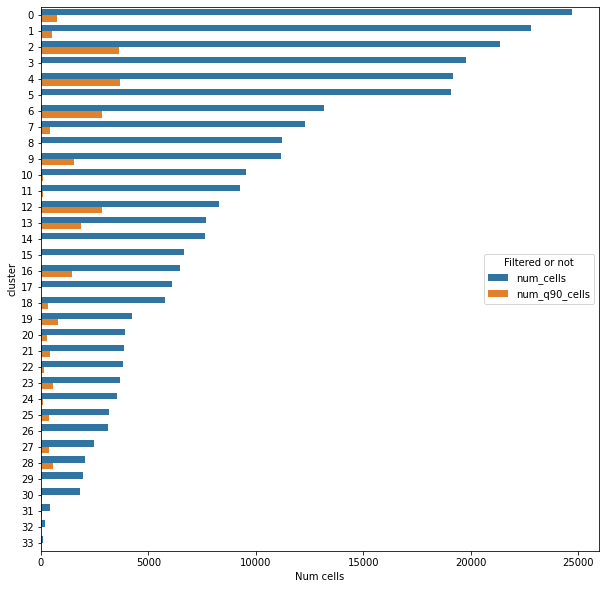

In [50]:
sns.barplot(
    x = 'Num cells',
    y = 'cluster',
    hue = 'Filtered or not',
    orient = 'h',
    data = unfilt_clust_counts.melt(
        id_vars='cluster',
        value_vars=['num_cells','num_q90_cells'],
        value_name='Num cells',
        var_name='Filtered or not',
    )
)
plt.show()
plt.close()